Imports

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Regression

$$
\begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
\vdots \\
y_n
\end{bmatrix}
=
\begin{bmatrix}
1 & x_{1,1} & x_{1,2} & \cdots & x_{1,m} \\
1 & x_{2,1} & x_{2,2} & \cdots & x_{2,m} \\
1 & x_{3,1} & x_{3,2} & \cdots & x_{3,m} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n,1} & x_{n,2} & \cdots & x_{n,m}
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_m
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_1 \\
\epsilon_2 \\
\epsilon_3 \\
\vdots \\
\epsilon_n
\end{bmatrix}
$$


In [11]:
def regression(X, y):
    beta_vector = np.matmul(
        np.linalg.inv(np.matmul(X.transpose(), X)),
        np.matmul(X.transpose(), y),
    )
    return beta_vector

Data

In [12]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

x1_mod = np.concatenate([x1, [0.1]])
x2_mod = np.concatenate([x2, [0.8]])
y_mod = np.concatenate([y, [6]])

Relationship

Correlation between x1 and x2: 0.772


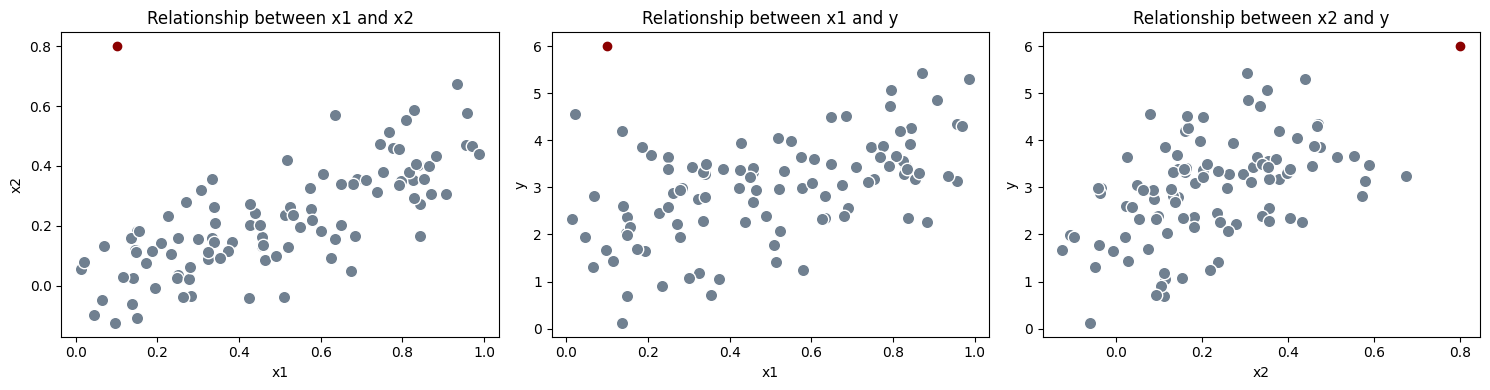

In [13]:
print(f"Correlation between x1 and x2: {np.corrcoef(x1, x2)[0,1]:.3f}")
fig = plt.figure(figsize=(15, 4))

fig.add_subplot(1, 3, 1)
plt.scatter(x1, x2, color="slategrey", edgecolors="w", s=80)
plt.scatter(0.1, 0.8, color="darkred")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Relationship between x1 and x2")

fig.add_subplot(1, 3, 2)
plt.scatter(x1, y, color="slategrey", edgecolors="w", s=80)
plt.scatter(0.1, 6, color="darkred")
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Relationship between x1 and y")

fig.add_subplot(1, 3, 3)
plt.scatter(x2, y, color="slategrey", edgecolors="w", s=80)
plt.scatter(0.8, 6, color="darkred")
plt.xlabel("x2")
plt.ylabel("y")
plt.title("Relationship between x2 and y")

plt.tight_layout()
plt.show()

T-statistics and p-values
$$
\text{Var}(AX) = A \times Var(X) \times A^T. \\
\hat{\beta} = (X^TX)^{-1}X^Ty \\ 
\text{Var}(\hat{\beta}) = \sigma^2 (X^T X)^{-1}

$$

In [18]:
def calc_tstats_pvals(X, beta_vector, error_variance=1):
    beta_variance = error_variance * np.linalg.inv(np.matmul(X.transpose(), X))
    standard_errors = np.sqrt(np.diag(beta_variance))

    t_stat1 = beta_vector[1] / standard_errors[1]
    t_stat2 = beta_vector[2] / standard_errors[2]
    p_value1 = (1 - norm.cdf(t_stat1)) * 2
    p_value2 = (1 - norm.cdf(t_stat2)) * 2
    return t_stat1, t_stat2, p_value1, p_value2

def calc_tstat_pval(X, beta_vector, error_variance=1):
    beta_variance = error_variance * np.linalg.inv(np.matmul(X.transpose(), X))
    standard_errors = np.sqrt(np.diag(beta_variance))
    t_stat = beta_vector[1] / standard_errors[1]
    p_value = (1 - norm.cdf(t_stat)) * 2
    return t_stat, p_value

In [14]:
X = np.column_stack([[1 for _ in range(len(y))], x1, x2])
beta_vector = regression(X, y)
t_stat1, t_stat2, p_value1, p_value2 = calc_tstats_pvals(X, beta_vector)
print("Original:")
print("\tTrue \u03B2: [2, 2, 0.3]")
print(f"\tPredicted \u03B2: {beta_vector}")
print(f"\t\u03B21:  t-statistic = {t_stat1:.3f}   p-value = {p_value1*100:.3f}%")
print(f"\t\u03B22:  t-statistic = {t_stat2:.3f}   p-value = {p_value2*100:.3f}%")

X_mod = np.column_stack([[1 for _ in range(len(y_mod))], x1_mod, x2_mod])
beta_vector_mod = regression(X_mod, y_mod)
t_stat1, t_stat2, p_value1, p_value2 = calc_tstats_pvals(X_mod, beta_vector_mod)
print("Modified:")
print("\tTrue \u03B2: [2, 2, 0.3]")
print(f"\tPredicted \u03B2: {beta_vector_mod}")
print(f"\t\u03B21:  t-statistic = {t_stat1:.3f}   p-value = {p_value1*100:.3f}%")
print(f"\t\u03B22:  t-statistic = {t_stat2:.3f}   p-value = {p_value2*100:.3f}%")

Original:
	True β: [2, 2, 0.3]
	Predicted β: [1.95790929 1.6153677  0.9427767 ]
	β1:  t-statistic = 2.781   p-value = 0.543%
	β2:  t-statistic = 1.029   p-value = 30.348%
Modified:
	True β: [2, 2, 0.3]
	Predicted β: [2.06179126 0.85754482 2.26632349]
	β1:  t-statistic = 1.724   p-value = 8.472%
	β2:  t-statistic = 3.016   p-value = 0.256%


Regression with $x_1$ only

In [16]:
X = np.column_stack([[1 for _ in range(len(y))], x1])
beta_vector = regression(X, y)
t_stat, p_value = calc_tstat_pval(X, beta_vector)
print("Original:")
print("\tTrue \u03B2: [2, 2]")
print(f"\tPredicted \u03B2: {beta_vector}")
print(f"\t\u03B21:  t-statistic = {t_stat:.3f}   p-value = {p_value*100:.6f}%")

X_mod = np.column_stack([[1 for _ in range(len(y_mod))], x1_mod])
beta_vector_mod = regression(X_mod, y_mod)
t_stat, p_value = calc_tstat_pval(X_mod, beta_vector_mod)
print("Modified:")
print("\tTrue \u03B2: [2, 2]")
print(f"\tPredicted \u03B2: {beta_vector}")
print(f"\t\u03B21:  t-statistic = {t_stat:.3f}   p-value = {p_value*100:.6f}%")

Original:
	True β: [2, 2]
	Predicted β: [1.93709015 2.07706235]
	β1:  t-statistic = 5.628   p-value = 0.000002%
Modified:
	True β: [2, 2]
	Predicted β: [1.93709015 2.07706235]
	β1:  t-statistic = 5.137   p-value = 0.000028%


Regression with $x_2$ only

In [17]:
X = np.column_stack([[1 for _ in range(len(y))], x2])
beta_vector = regression(X, y)
t_stat, p_value = calc_tstat_pval(X, beta_vector)
print("Original:")
print("\tTrue \u03B2: [2, 2]")
print(f"\tPredicted \u03B2: {beta_vector}")
print(f"\t\u03B21:  t-statistic = {t_stat:.3f}   p-value = {p_value*100:.6f}%")

X_mod = np.column_stack([[1 for _ in range(len(y_mod))], x2_mod])
beta_vector_mod = regression(X_mod, y_mod)
t_stat, p_value = calc_tstat_pval(X_mod, beta_vector_mod)
print("Modified:")
print("\tTrue \u03B2: [2, 2]")
print(f"\tPredicted \u03B2: {beta_vector}")
print(f"\t\u03B21:  t-statistic = {t_stat:.3f}   p-value = {p_value*100:.6f}%")

Original:
	True β: [2, 2]
	Predicted β: [2.32389001 2.91032323]
	β1:  t-statistic = 5.001   p-value = 0.000057%
Modified:
	True β: [2, 2]
	Predicted β: [2.32389001 2.91032323]
	β1:  t-statistic = 5.702   p-value = 0.000001%
